<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>

# Challenge S2 : Introducción a los Modelos de Previsión en Series Temporales

# 0. Objetivo

El objetivo de este challenge es realizar previsiones de series temporales, utilizando modelos sencillos para familiarizarnos con los principales conceptos de la modelización y previsión de variables

<img src="bicicletas_chicago_challenge.jpg" style="float:right; height: 250px"></img>
Vamos a seguir con el caso práctico de previsión sobre los alquileres de bicicletas de Chicago, pero en este caso vamos a realizar un estudio más a medio plazo, pues nos piden una previsión sobre cual va a ser el alquiler de bicicletas para los próximos **4 TRIMESTRES**. 

Para ello disponemos del histórico de alquileres de los últimos 7 años a nivel TRIMESTRAL.

Contesta a las diferentes preguntas que aparecen en el desarrollo.


## 1. Preparar el contexto

Como paso previo, cargamos las librerías que serán necesarias en nuestro estudio.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Pretratado de los datos

Recuerda que en este ejercicio, debemos leer nuestro fichero y crear un dataframe que incluya nuestro histórico y las fechas en las que queremos hacer la previsión.

No olvides que seguimos trabajando con series temporales, por lo que, tendremos una variable tiempo.

In [2]:
## Lectura de los datos
data_path = 'year_q_chicago.csv'
df_datos = pd.read_csv(data_path)

In [3]:
## Revisión de los datos
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
cnt     28 non-null int64
date    28 non-null object
dtypes: int64(1), object(1)
memory usage: 528.0+ bytes


In [4]:
df_datos.tail()

,cnt,date
23,1130918,2016-12-31
24,1106201,2017-03-31
25,1514973,2017-06-30
26,2067336,2017-09-30
27,1303435,2017-12-31


In [5]:
## Creamos un campo fecha
df_datos['date'] = pd.to_datetime(df_datos['date'], format='%Y-%m-%d')


In [6]:
## Creamos un dataframe con el histórico
df_alquileres = pd.DataFrame(df_datos['cnt'].tolist(),
                             index = df_datos['date'].tolist(),
                             columns = ['cnt'])

Recordemos que vamos a realizar la predicción sobre los **4 trimestres** siguientes.

In [7]:
## Periodos en los que vamos a hacer la predicción
periodos = pd.date_range('2018-03-31', periods = 4, freq = 'Q')
periodos

DatetimeIndex(['2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31'], dtype='datetime64[ns]', freq='Q-DEC')

In [8]:
## Creamos un dataframe con nuestras fechas a predecir
df_prediccion = pd.DataFrame({'cnt':[np.nan,np.nan,np.nan,np.nan]},
                             index = periodos)
df_prediccion

,cnt
2018-03-31,NaN
2018-06-30,NaN
2018-09-30,NaN
2018-12-31,NaN


In [9]:
## Unimos el dataframe del histórico y el de la predicción
df_alquileres = pd.concat([df_alquileres, df_prediccion], ignore_index = False)

## 2. Componentes de la serie temporal

Representa la serie resultante.

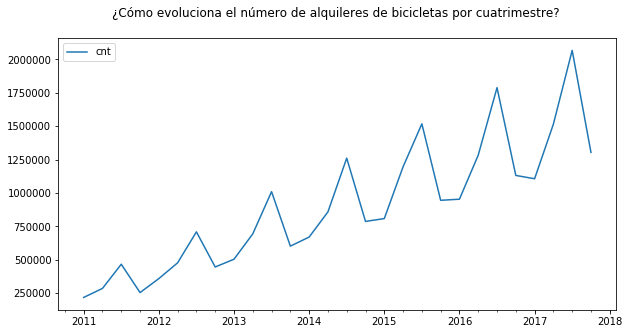

In [10]:
## Representamos la serie temporal
df_alquileres.plot(figsize=(10,5),
                  title='¿Cómo evoluciona el número de alquileres de bicicletas por cuatrimestre? \n')

##### *P: ¿Qué componentes de una serie temporal tiene el alquiler de bicicletas?*

Tendencia y estacionalidad

## 3. Predicciones sobre la serie temporal

Para realizar nuestra predicción vamos a reutilizar los tres modelos que hemos usado en el desarrollo del worksheet:

Modelo 1: *Mi previsión de alquileres = Alquileres último dato*

Modelo 2: *Mi previsión de alquileres = Alquileres último dato + la variación del último dato*

Modelo 3: *Mi previsión de alquileres = Media de TODOS los alquileres*

### 3.1.- Modelo 1

Utiliza este modelo para calcular la previsión y represéntala gráficamente.

Mi previsión de alquileres = Alquileres último año (en este caso trimestre)

In [11]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M1'] = np.nan
df_alquileres['prevision_M1'][-5:]=df_alquileres['cnt'][-5]
df_alquileres

,cnt,prevision_M1
2011-03-31,217543.0,NaN
2011-06-30,285236.0,NaN
2011-09-30,466163.0,NaN
2011-12-31,254159.0,NaN
2012-03-31,358675.0,NaN
2012-06-30,476774.0,NaN
2012-09-30,708591.0,NaN
2012-12-31,445534.0,NaN
2013-03-31,503706.0,NaN
2013-06-30,693602.0,NaN


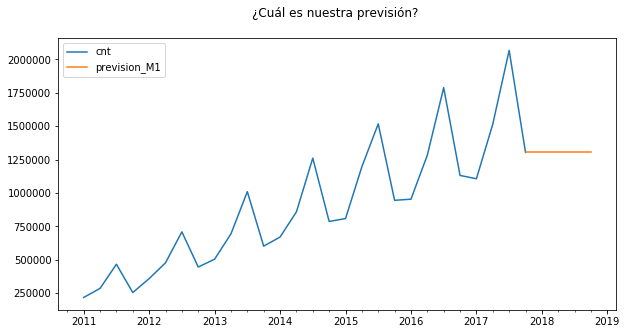

In [12]:
## Representamos el resultado
df_alquileres.plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')

##### *P: ¿Qué le pasa a mi previsión? ¿cómo podría mejorarla?*

Esta previsión se realiza de la componente aleatoria, pero aún no tiene la componente de tendencia y estacionalidad asociada.

### 3.2.- Modelo 2

Utiliza este modelo para calcular la previsión y represéntala gráficamente.

Mi previsión de alquileres = Alquileres último dato + la variación del último dato

In [13]:
## Hacemos un desplazamiento de nuestra variable para calcular esa variación
df_alquileres['cnt_shift'] = df_alquileres['cnt'].shift(1)
df_alquileres['var AA'] = df_alquileres['cnt'] - df_alquileres['cnt_shift']
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M2']=np.nan
## Igualamos el último valor al registro correspondiente de la nueva variable (para que se vea mejor la representación)
df_alquileres['prevision_M2'][-5] = df_alquileres['cnt'][-5]

In [14]:
## Rellenamos la variable con la variación, replicando el último valor hasta el final
## ffill: propagate last valid observation forward to next valid backfill
df_alquileres['var AA']=df_alquileres['var AA'].fillna(method='ffill')
## Sumamos el acumulado de esa variación a la previsión que tenemos del modelo 1
df_alquileres['prevision_M2'][-4:] = df_alquileres['var AA'][-4:].cumsum() +\
                                     df_alquileres['prevision_M1'][-4:]
df_alquileres

,cnt,prevision_M1,cnt_shift,var AA,prevision_M2
2011-03-31,217543.0,NaN,NaN,NaN,NaN
2011-06-30,285236.0,NaN,217543.0,67693.0,NaN
2011-09-30,466163.0,NaN,285236.0,180927.0,NaN
2011-12-31,254159.0,NaN,466163.0,-212004.0,NaN
2012-03-31,358675.0,NaN,254159.0,104516.0,NaN
2012-06-30,476774.0,NaN,358675.0,118099.0,NaN
2012-09-30,708591.0,NaN,476774.0,231817.0,NaN
2012-12-31,445534.0,NaN,708591.0,-263057.0,NaN
2013-03-31,503706.0,NaN,445534.0,58172.0,NaN
2013-06-30,693602.0,NaN,503706.0,189896.0,NaN


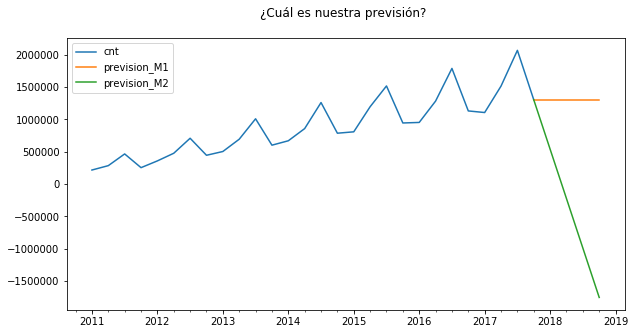

In [15]:
## Representamos el resultado
df_alquileres.loc[:,['cnt','prevision_M1','prevision_M2']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')

#### *P: ¿Si comparamos las previsiones del M1 y el M2 en qué se diferencian?*

En M2 se obtiene la predicción con la tendencia a la baja de la última parte de la señal temporal. 
En M1 esa tendencia no se consideraba

### Modelo 3

Utiliza este modelo para calcular la previsión y represéntala gráficamente.

Mi previsión de alquileres = Media de TODOS los alquileres

In [16]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M3'] = np.nan
df_alquileres['prevision_M3'][-4:] = df_alquileres['cnt'].mean()
df_alquileres['prevision_M3'][-5] = df_alquileres['cnt'][-5]

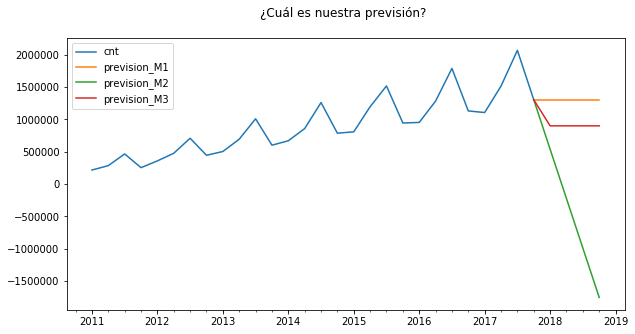

In [17]:
## Representamos el resultado
## Representamos el resultado
df_alquileres.loc[:,['cnt','prevision_M1','prevision_M2', 'prevision_M3']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')

#### *P: ¿Qué le ha pasado ahora a mi previsión para el M3?*

Se produce una representación del valor medio de la señal temporal, que es  un valor algo más bajo que la última parte de la serie

#### *P: ¿Cómo podría mejorar mi previsión del M3?*

Teniendo en cuenta la estacionalidad y tendencia de la serie.

#### *P: ¿Qué modelo elegirías el M1, el M2 o el M3? ¿Por qué?*

EL modelo M1 se podría ajustar más al comportamiento de la señal

## 4. Predicciones mejoradas sobre la serie temporal

Para realizar las predicciones vamos a eliminar primero las componentes de la serie temporal, de manera que calculemos nuestra previsión sobre el residuo.

### 4.1.-  Eliminar las componentes de la serie: estacionalidad y tendencia

#### a) Elimina la estacionalidad y representa los resultados.

##### *P: ¿Cómo podemos eliminar la estacionalidad? ¿Qué ventana móvil debemos usar? ¿Por qué?*

Debido a que la estacionalidad es anual, y nuestra predicción es cuatrimestral, con la ventana de movil 4 haremos los 4 cuatrimestres por año de media

In [18]:
## Eliminamos la estacionalidad de la serie
ventana = 4
df_alquileres['cnt_mm4'] = df_alquileres['cnt'].rolling(ventana).mean()

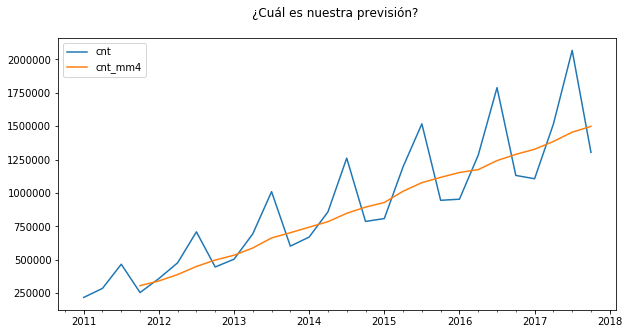

In [19]:
## Representamos el resultado
df_alquileres.loc[:,['cnt', 'cnt_mm4']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fa68c88>,
      dtype=object)

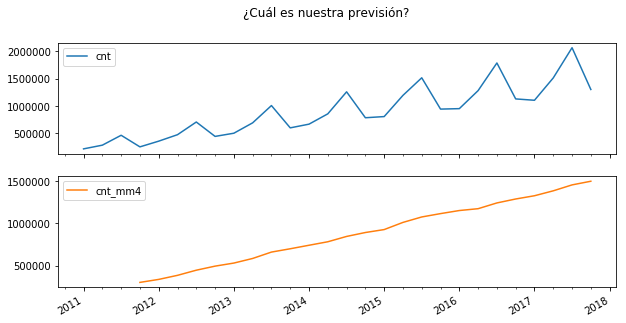

In [20]:
## Representamos el resultado
df_alquileres.loc[:,['cnt', 'cnt_mm4']].plot(figsize=(10,5), subplots = True,
                  title='¿Cuál es nuestra previsión? \n')

#### b) Elimina la tendencia y representa los resultados.

##### *P: ¿Cómo podemos eliminar la tendencia?*

In [21]:
## Eliminamos la tendencia
df_alquileres['cnt_mm4_st'] = df_alquileres['cnt_mm4'] - df_alquileres['cnt_mm4'].shift(1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11fcb8e10>,
      dtype=object)

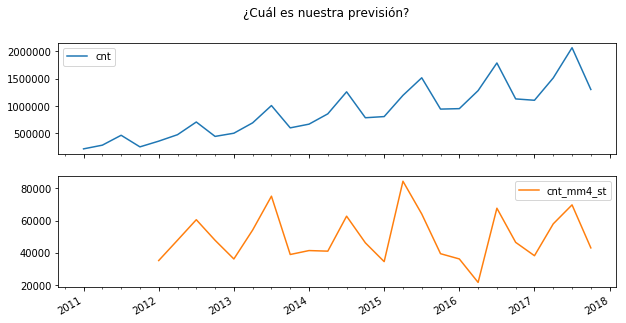

In [22]:
## Representamos el resultado
df_alquileres.loc[:,['cnt', 'cnt_mm4_st']].plot(figsize=(10,5), subplots = True,
                  title='¿Cuál es nuestra previsión? \n')

### 4.2.-  Realizar la previsión

Realiza la previsión sobre la componente aleatoria. Utiliza alguno de los modelos que hemos visto y representa los resultados.

In [23]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan
df_alquileres['prevision_M3b'] = np.nan
df_alquileres['prevision_M3b'][-4:] = df_alquileres['cnt_mm4_st'].mean()
df_alquileres['prevision_M3b'][-5] = df_alquileres['cnt'][-5]

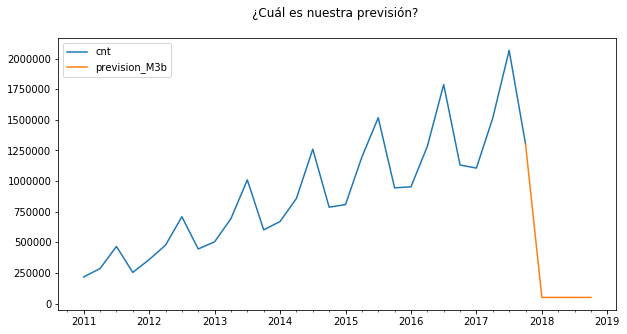

In [24]:
## Representamos nuestra previsión
df_alquileres.loc[:,['cnt','prevision_M3b']].plot(figsize=(10,5),
                  title='¿Cuál es nuestra previsión? \n')


#### *P: Esta previsión, ¿qué significa? ¿cómo lo puedo convertir en un número que se parezca a mis alquileres?*

Es la media sin tendencia y habría que aãdirle la estacionalidad y tendencia a la parte aleatoria

### 4.3.-  Incorporar las componentes de la serie: estacionalidad y tendencia

#### a) Incorpora la tendencia a la previsión de alquileres y representa los resultados.

In [25]:
## Creamos un campo para nuestra previsión y lo rellenamos con Nan 
df_alquileres['prevision_M3b_ct']=np.nan
## ffill: propagate last valid observation forward to next valid backfill
df_alquileres['cnt_mm4']=df_alquileres['cnt_mm4'].fillna(method='ffill')
## Toma la variación de la serie sin estacionalidad
## Sumamos el acumulado de la previsión a nuestra serie con tendencia
df_alquileres['prevision_M3b_ct'][-5] = df_alquileres['cnt'][-5]
df_alquileres['prevision_M3b_ct'][-4:] = df_alquileres['prevision_M3b'][-4:].cumsum()\
                                      + df_alquileres['cnt_mm4'][-4:]
df_alquileres

,cnt,prevision_M1,cnt_shift,var AA,prevision_M2,prevision_M3,cnt_mm4,cnt_mm4_st,prevision_M3b,prevision_M3b_ct
2011-03-31,217543.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-30,285236.0,NaN,217543.0,67693.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-09-30,466163.0,NaN,285236.0,180927.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31,254159.0,NaN,466163.0,-212004.0,NaN,NaN,305775.25,NaN,NaN,NaN
2012-03-31,358675.0,NaN,254159.0,104516.0,NaN,NaN,341058.25,35283.00,NaN,NaN
2012-06-30,476774.0,NaN,358675.0,118099.0,NaN,NaN,388942.75,47884.50,NaN,NaN
2012-09-30,708591.0,NaN,476774.0,231817.0,NaN,NaN,449549.75,60607.00,NaN,NaN
2012-12-31,445534.0,NaN,708591.0,-263057.0,NaN,NaN,497393.50,47843.75,NaN,NaN
2013-03-31,503706.0,NaN,445534.0,58172.0,NaN,NaN,533651.25,36257.75,NaN,NaN
2013-06-30,693602.0,NaN,503706.0,189896.0,NaN,NaN,587858.25,54207.00,NaN,NaN


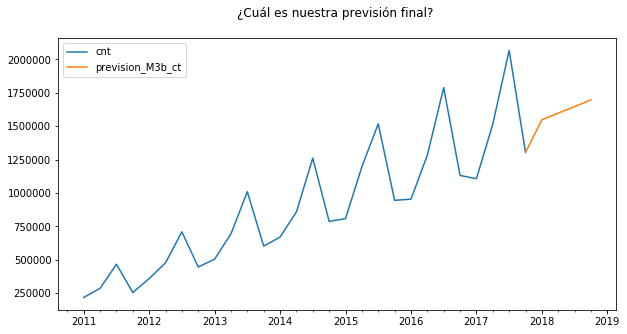

In [26]:
## Representamos nuestra previsión
df_alquileres.loc[:,['cnt','prevision_M3b_ct']].plot(figsize=(10,5),
                                                     title='¿Cuál es nuestra previsión final? \n')

#### b) Incorpora la estacionalidad a la previsión de alquileres y representa los resultados.

Una forma sencilla sería calcular los coeficientes de estacionalidad vs la serie de media móvil y aplicar los últimos coeficientes ( o una media, ...) a mis previsiones para incorporar la estacionalidad.

In [27]:
df_alquileres['cnt_media_movil_4']=df_alquileres['cnt'].rolling(4).mean()

In [28]:
## Calculamos los coeficientes de estacionalidad
df_alquileres['coef_estac']=df_alquileres['cnt'] \
                                                /df_alquileres['cnt_media_movil_4']

In [29]:
## Aplicamos los coeficientes de estacionalidad sobre nuestra previsión con tendencia
## Como queremos la previsión para 4 trimestres, desplazamos esos coeficientes y los multiplicamos por 
## el valor de la previsión con tendencia
df_alquileres['prevision_M3b_ct_cs'] = df_alquileres['prevision_M3b_ct']  \
                                     * df_alquileres['coef_estac'].shift(4)
df_alquileres['prevision_M3b_ct_cs'][-5] = df_alquileres['cnt'][-5]

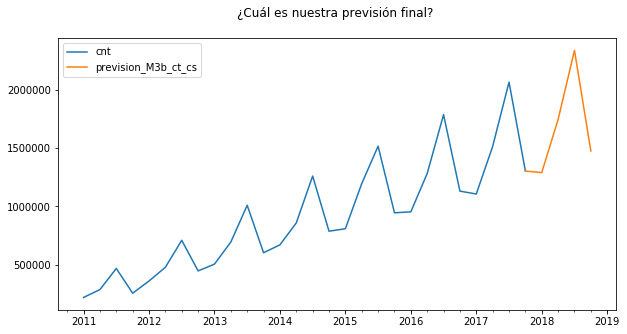

In [30]:
## Representamos nuestra previsión
df_alquileres.loc[:,['cnt','prevision_M3b_ct_cs']].plot(figsize=(10,5),
                                                     title='¿Cuál es nuestra previsión final? \n')

